<a href="https://colab.research.google.com/github/NaziBaramaki/SAR_DATA/blob/main/Reading_Sentinel_1_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Collecting data**

In [1]:
pip install sentinelhub

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=0a67722b08a7b412004d50061e3150893d59f5563de4a3340cc60447c77d53f6
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [2]:
import datetime
import getpass

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import geopandas as gpd
import json
from ipyleaflet import Map, GeoJSON, basemaps

from sentinelhub import (
    SHConfig,
    Geometry,
    DataCollection,
    MimeType,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)


In [3]:
# Only run this cell if you have not created a configuration.

config = SHConfig()
config.sh_client_id = getpass.getpass("Enter your SentinelHub client id") #Nazib1393@gmail.com
config.sh_client_secret = getpass.getpass("Enter your SentinelHub client secret") #Nazi@13931393
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
config.sh_base_url = "https://sh.dataspace.copernicus.eu"
config.save("cdse")

Enter your SentinelHub client id··········
Enter your SentinelHub client secret··········


In [4]:
config = SHConfig("cdse")

**Reading Sentinel-1 data**

In [6]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE.zip to S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE.zip


In [8]:
import zipfile
import io

# Replace 'your_file.zip' with the actual file name you uploaded
zip_file_name = 'S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE.zip'
# zip_file_name = 'S1A_EW_GRDM_1SDH_20241202T153752_20241202T153851_056815_06F9A3_1683_COG.SAFE.zip'
# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')  # Specify the directory to extract to

**Showing Imagies**

In [10]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.1 MB/s eta 0:00:00


In [13]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [16]:
import os

# Path to the measurement directory
measurement_path = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/measurement'

# List the contents of the measurement directory
for root, dirs, files in os.walk(measurement_path):
    print(f'Directory: {root}')
    for file in files:
        print(file)

Directory: /content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/measurement
s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.tiff
s1a-ew-grd-hv-20241202t153652-20241202t153752-056815-06f9a3-002-cog.tiff


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


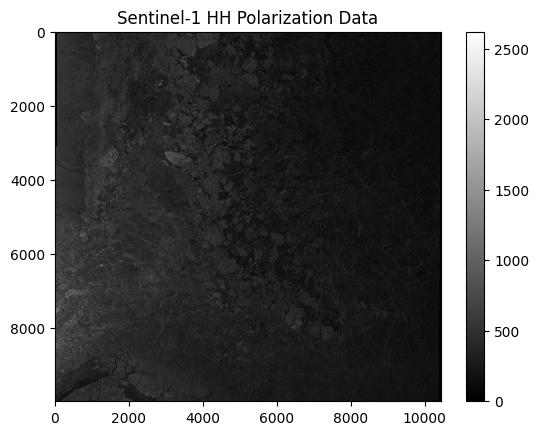

In [17]:
import rasterio
import matplotlib.pyplot as plt

# Path to the HH polarized TIFF file
hh_file = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/measurement/s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.tiff'

# Read the HH data
with rasterio.open(hh_file) as src:
    hh_band = src.read(1)  # Read the first band
    print(hh_band)

# Visualize the data
plt.imshow(hh_band, cmap='gray')
plt.colorbar()
plt.title('Sentinel-1 HH Polarization Data')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


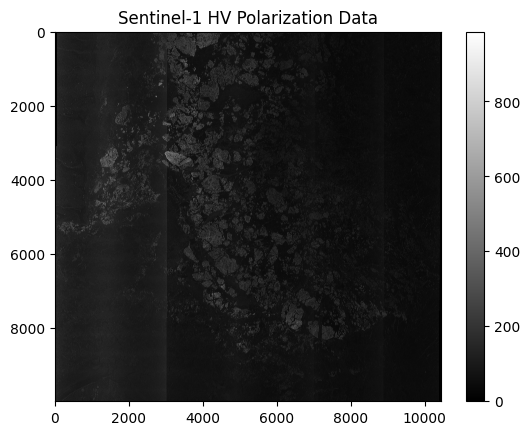

In [18]:
# Path to the HV polarized TIFF file
hv_file = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/measurement/s1a-ew-grd-hv-20241202t153652-20241202t153752-056815-06f9a3-002-cog.tiff'

# Read the HV data
with rasterio.open(hv_file) as src:
    hv_band = src.read(1)  # Read the first band
    print(hv_band)

# Visualize the HV data
plt.imshow(hv_band, cmap='gray')
plt.colorbar()
plt.title('Sentinel-1 HV Polarization Data')
plt.show()

**Reading annotation file**

In [19]:
# Path to the annotation directory
annotation_path = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/annotation'

# List the contents of the annotation directory
for root, dirs, files in os.walk(annotation_path):
    print(f'Directory: {root}')
    for file in files:
        print(file)

Directory: /content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/annotation
s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.xml
s1a-ew-grd-hv-20241202t153652-20241202t153752-056815-06f9a3-002-cog.xml
Directory: /content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/annotation/calibration
noise-s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.xml
calibration-s1a-ew-grd-hv-20241202t153652-20241202t153752-056815-06f9a3-002-cog.xml
noise-s1a-ew-grd-hv-20241202t153652-20241202t153752-056815-06f9a3-002-cog.xml
calibration-s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.xml
Directory: /content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/annotation/rfi
rfi-s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.xml
rfi-s1a-ew-grd-hv-20241202t153652-20241202t153752-056815-06f9a3-002-

In [23]:
# Read the Main Annotation Files

import xml.etree.ElementTree as ET

# Path to the HH annotation XML file
hh_annotation_file = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/annotation/s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.xml'
hv_annotation_file = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/annotation/s1a-ew-grd-hv-20241202t153652-20241202t153752-056815-06f9a3-002-cog.xml'

print("HH")
# Parse the XML file
tree1 = ET.parse(hh_annotation_file)
root1 = tree1.getroot()

# Print the root tag and some structure
print(f'Root tag: {root1.tag}')
for child in root1:
    print(child.tag, child.attrib)

print("HV")
# Parse the XML file
tree2 = ET.parse(hv_annotation_file)
root2 = tree2.getroot()

# Print the root tag and some structure
print(f'Root tag: {root2.tag}')
for child in root2:
    print(child.tag, child.attrib)

HH
Root tag: product
adsHeader {}
qualityInformation {}
generalAnnotation {}
imageAnnotation {}
dopplerCentroid {}
antennaPattern {}
swathTiming {}
geolocationGrid {}
coordinateConversion {}
swathMerging {}
HV
Root tag: product
adsHeader {}
qualityInformation {}
generalAnnotation {}
imageAnnotation {}
dopplerCentroid {}
antennaPattern {}
swathTiming {}
geolocationGrid {}
coordinateConversion {}
swathMerging {}


In [24]:
# Explore Specific Metadata
# Example: Find specific tags within the XML
for metadata in root.findall('.//{http://www.w3.org/2001/XMLSchema-instance}metadata'):
    print(ET.tostring(metadata, encoding='utf8').decode('utf8'))

# If you want to explore specific fields, you can adjust the search path accordingly
for acquisition in root.findall('.//{http://www.w3.org/2001/XMLSchema-instance}acquisition'):
    date_time = acquisition.find('{http://www.w3.org/2001/XMLSchema-instance}startTime')
    if date_time is not None:
        print('Acquisition Start Time:', date_time.text)

**preview folder**

In [25]:
import os

# Path to the preview directory
preview_path = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/preview'

# List the contents of the preview directory
for root, dirs, files in os.walk(preview_path):
    print(f'Directory: {root}')
    for file in files:
        print(file)

Directory: /content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/preview
map-overlay.kml
thumbnail.png
quick-look.png
product-preview.html
Directory: /content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/preview/icons
logo.png


In [26]:
import os

# Path to the preview directory
preview_path = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/support'

# List the contents of the preview directory
for root, dirs, files in os.walk(preview_path):
    print(f'Directory: {root}')
    for file in files:
        print(file)

Directory: /content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/support
s1-level-1-quicklook.xsd
s1-level-1-calibration.xsd
s1-level-1-rfi.xsd
s1-level-1-measurement.xsd
s1-level-1-product.xsd
s1-product-preview.xsd
s1-map-overlay.xsd
s1-level-1-noise.xsd
s1-object-types.xsd


**Applying a Machine learning model for classification**

In [29]:
import rasterio
import numpy as np

# Path to the Sentinel-1 GRD data (replace with your actual path)
data_path = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/measurement/s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.tiff'

# Read the data
with rasterio.open(data_path) as src:
    band1 = src.read(1)  # Read the first band (VV)
    band2 = src.read(2)  # Read the second band (VH) if available

# Create a mask for valid data (not NaN or zero)
valid_data_mask = (band1 > 0) & (band2 > 0)

# Stack bands into a feature array
features = np.array([band1[valid_data_mask], band2[valid_data_mask]]).T

IndexError: band index 2 out of range (not in (1,))

In [30]:
import rasterio

data_path = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/measurement/s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.tiff'

with rasterio.open(data_path) as src:
    print(src.count)  # Print the number of bands
    print(src.meta)   # Print metadata to inspect band names and types

1
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 10437, 'height': 9991, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


In [31]:
with rasterio.open(data_path) as src:
    band1 = src.read(1)  # Read the first band (VV)

# If there's only one band, use it for classification
# You may need to create a target label array for classification if not already done
features = band1[band1 > 0].reshape(-1, 1)  # Reshape for a single feature

In [33]:
import rasterio
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Path to the Sentinel-1 GRD data
data_path = '/content/extracted_files/S1A_EW_GRDM_1SDH_20241202T153652_20241202T153752_056815_06F9A3_C286_COG.SAFE/measurement/s1a-ew-grd-hh-20241202t153652-20241202t153752-056815-06f9a3-001-cog.tiff'

with rasterio.open(data_path) as src:
    band1 = src.read(1)  # Read the first band (VV)

# Create a mask for valid data (not NaN or zero)
valid_data_mask = band1 > 0

# Reshape features for classification
features = band1[valid_data_mask].reshape(-1, 1)

# Assuming you have a labeled dataset
# labels = np.array([...])  # Load your labels for ice/water here

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))

# Predict on the entire dataset
full_predictions = rf_classifier.predict(features)

# Reshape predictions back to the original image shape
prediction_image = np.zeros(band1.shape)
prediction_image[valid_data_mask] = full_predictions

# Visualize the results
plt.imshow(prediction_image, cmap='gray')
plt.title('Ice and Water Classification')
plt.colorbar()
plt.show()

NameError: name 'labels' is not defined